<a href="https://colab.research.google.com/github/muken1128/machine-learning/blob/main/regression/liner_regression002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.dpac.dpri.kyoto-u.ac.jp/enomoto/pymetds/Huber.html

In [ ]:
# 最小二乗法を用いる

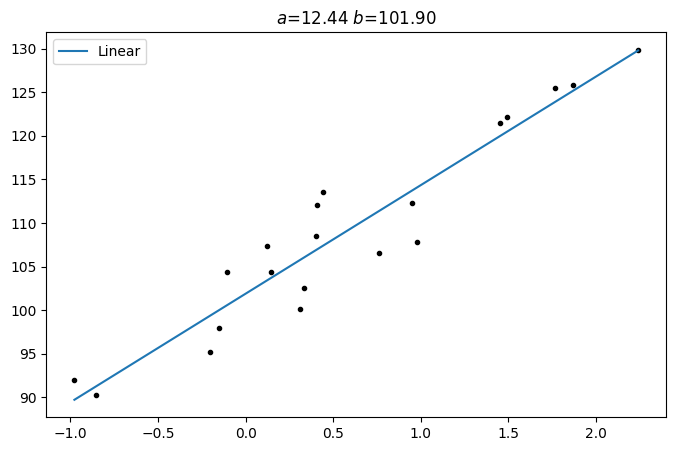

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

fig, ax = plt.subplots(figsize=[8,5])

rng = np.random.RandomState(0)
X, y = make_regression(n_samples=20, n_features=1, random_state=0,
                      noise=4.0, bias=100.0)

ax.plot(X, y, 'k.')

x = np.linspace(X.min(), X.max(), 7)
lin = LinearRegression()
lin.fit(X, y)
y_linear = lin.coef_ * x + lin.intercept_
ax.set_title(f"$a$={lin.coef_[0]:.2f} $b$={lin.intercept_:.2f}")
ax.plot(x, y_linear, label="Linear")
ax.legend()
plt.show()

In [ ]:
# 外れ値を作る。

w/o outliers: a=12.44 b=101.90
w/ outliers: a=-4.36 b=112.32


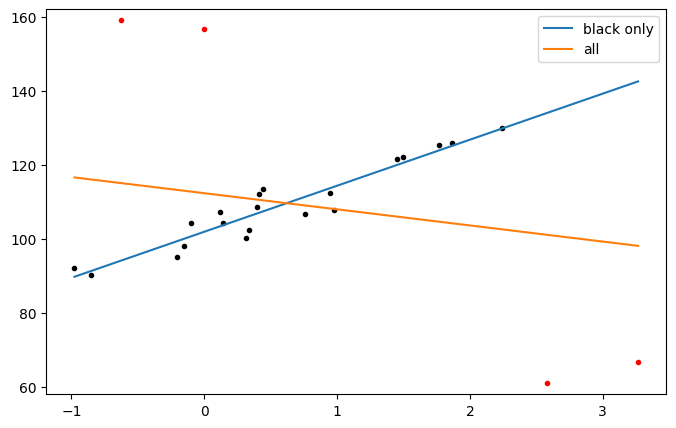

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, HuberRegressor

fig, ax = plt.subplots(figsize=[8,5])

rng = np.random.RandomState(0)
X, y = make_regression(n_samples=20, n_features=1, random_state=0,
                       noise=4.0, bias=100.0)
ax.plot(X, y, 'k.')
Xo = rng.normal(0, 0.5, size=(4, 1))
yo = rng.normal(0, 2.0, size=4)
Xo[:2, :] += X.max() + X.mean() / 4
Xo[2:, :] += X.min() - X.mean() / 4
yo[:2] += y.min() - y.mean() / 4
yo[2:] += y.max() + y.mean() / 4
X1 = np.vstack([X, Xo])
y1 = np.concatenate([y, yo])
ax.plot(Xo, yo, 'r.')

x = np.linspace(X1.min(), X1.max(), 7)
lin = LinearRegression()
lin.fit(X, y)
y_linear = lin.coef_ * x + lin.intercept_
print(f"w/o outliers: a={lin.coef_[0]:.2f} b={lin.intercept_:.2f}")
ax.plot(x, y_linear, label="black only")
lin.fit(X1, y1)
y_linear = lin.coef_ * x + lin.intercept_
print(f"w/ outliers: a={lin.coef_[0]:.2f} b={lin.intercept_:.2f}")
ax.plot(x, y_linear, label="all")
ax.set_ylim([58, 162])
ax.legend()
plt.show()